In [ ]:
# Stiahnutie datasetu
!pip install wget
import wget
url = 'https://drive.google.com/uc?export=download&id=1RPSJniuQGqTOLBx01e6YXxdOoKxawNfa'
wget.download(url, '/dot-usd-max.csv')

# Načítanie datasetu pomocou pandas
import pandas as pd
from datetime import datetime, timedelta
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%y')
dataset = pd.read_csv("/dot-usd-max.csv", parse_dates=['snapped_at'], index_col='snapped_at', date_parser=dateparse)
dataset.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


,price,market_cap,total_volume
snapped_at,,,
2020-08-19,2.936665,0,8.241398e+07
2020-08-20,2.936665,0,8.241398e+07
2020-08-21,2.898791,0,4.951174e+07
2020-08-22,2.871923,0,5.123375e+07
2020-08-23,4.481389,4028277492,4.739210e+08
2020-08-24,3.966083,3630430966,3.356852e+08
2020-08-25,4.576939,4162344882,3.955026e+08
2020-08-26,5.493947,4910960800,7.296119e+08
2020-08-27,6.067730,5508438432,8.533768e+08


  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=d18af5adca986139acc854e7b853ed5476d7baf668cd1b9640307639df319a65
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Formát dát
Tréningové dáta:  (166, 100) (166,)  Testovacie dáta:  (72, 100) (72,)
Presnosť modelu:  0.39922389328255947


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (952) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ValueError: ignored

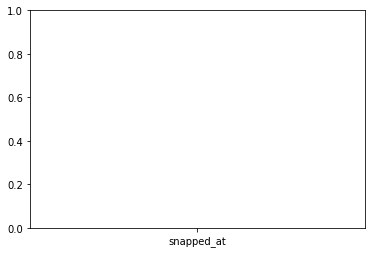

In [ ]:
# Stiahnutie datasetu
!pip install wget
import wget
url = 'https://drive.google.com/uc?export=download&id=1RPSJniuQGqTOLBx01e6YXxdOoKxawNfa'
wget.download(url, '/dot-usd-max.csv')

# Načítanie datasetu pomocou pandas
import pandas as pd
new_header = ['snapped_at', 'price', 'market_cap', 'total_volume']
dataset = pd.read_csv("/dot-usd-max.csv",  header=None, names=new_header)

# Import MLP
from sklearn.neural_network import MLPRegressor

# Rozdelenie datasetu na cenu a ostatne atributy
atributy = ['market_cap','total_volume']
X = dataset[atributy]
y = dataset.price

# Aplikovanie regresie na data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=238)

# Rozdelenie datasetu na tréningové a testovacie dáta
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Výpis formátu dát
print("Formát dát")
print("Tréningové dáta: ", X_train.shape, y_train.shape, " Testovacie dáta: ", X_test.shape, y_test.shape)

# Vytvorenie modelu
regr = MLPRegressor(random_state=0, max_iter=952)

# Trenovanie modelu
regr.fit(X_train, y_train)

# Predpovedanie hodnôt pre testovacie dáta
y_pred = regr.predict(X_test)

# Presnost modelu
print("Presnosť modelu: ", regr.score(X_test, y_test))

# Vykreslenie porovnania prepovedanej a realnej ceny
import matplotlib.pyplot as plt
plt.plot(dataset['snapped_at'], y_test, label="realna cena")
plt.plot(dataset['snapped_at'] , y_pred, label="predpovedana cena")
plt.xlabel(dataset['snapped_at'])
plt.ylabel(dataset['price'])
plt.title('Predpovedana vs. realna cena')
plt.legend()
plt.show()